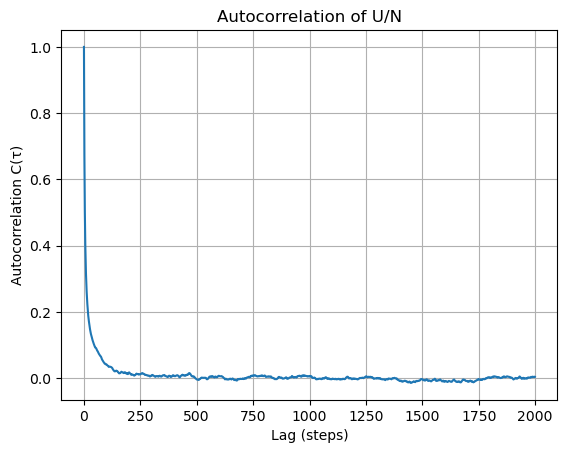

Tempo di autocorrelazione integrato: 13.39 steps

Informazioni aggiuntive:
Lunghezza serie temporale: 500000 steps
Numero di campioni indipendenti approssimativo: 37348
Errore statistico ridotto di un fattore: 3.66


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Carica il file
data = np.loadtxt("./potential_energy_montecarlo.dat", usecols=1)  # ACTUAL_PE
U = data - np.mean(data)   # centro sui valori

M = len(U)
C = np.correlate(U, U, mode='full')
C = C[M-1:] / C[M-1]  # normalizzazione

# Plot dell'autocorrelazione
plt.plot(C[:2000])  # prime 2000 lag
plt.xlabel("Lag (steps)")
plt.ylabel("Autocorrelation C(τ)")
plt.title("Autocorrelation of U/N")
plt.grid(True)
plt.show()

# Metodo robusto: tempo di autocorrelazione integrato con finestra automatica
def integrated_autocorrelation_time(C):
    """
    Calcola il tempo di autocorrelazione integrato con finestra automatica
    basata sul criterio di Sokal (finestra = 6 * tau_int)
    """
    # Stima iniziale con finestra fissa ragionevole
    window = min(1000, len(C)//4)
    tau_prev = 0.5
    for i in range(1, window):
        tau_prev += C[i]
        if C[i] < 0:
            break
    
    # Iterazione per convergenza (massimo 10 iterazioni)
    for iteration in range(10):
        window = min(6 * int(tau_prev) + 1, len(C)//2)
        tau_int = 0.5
        for i in range(1, window):
            tau_int += C[i]
            if C[i] < 0:
                break
        
        # Controlla convergenza
        if abs(tau_int - tau_prev) < 0.1:
            break
        tau_prev = tau_int
    
    return tau_int

tau_int = integrated_autocorrelation_time(C)
print(f"Tempo di autocorrelazione integrato: {tau_int:.2f} steps")

# Stampa informazioni utili
print(f"\nInformazioni aggiuntive:")
print(f"Lunghezza serie temporale: {M} steps")
print(f"Numero di campioni indipendenti approssimativo: {M/tau_int:.0f}")
print(f"Errore statistico ridotto di un fattore: {np.sqrt(tau_int):.2f}")

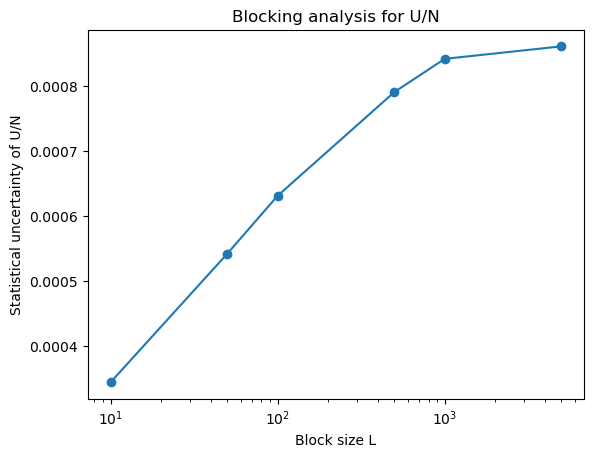

In [8]:
def block_average(data, L):
    M = len(data)
    N_blocks = M // L
    block_means = np.array([np.mean(data[i*L:(i+1)*L]) for i in range(N_blocks)])
    mean = np.mean(block_means)
    var = np.var(block_means, ddof=1)
    error = np.sqrt(var / N_blocks)
    return mean, error

L_values = [10, 50, 100, 500, 1000, 5000]
errors = []

for L in L_values:
    mean, err = block_average(data, L)
    errors.append(err)

plt.errorbar(L_values, errors, fmt='o-')
plt.xscale("log")
plt.xlabel("Block size L")
plt.ylabel("Statistical uncertainty of U/N")
plt.title("Blocking analysis for U/N")
plt.show()


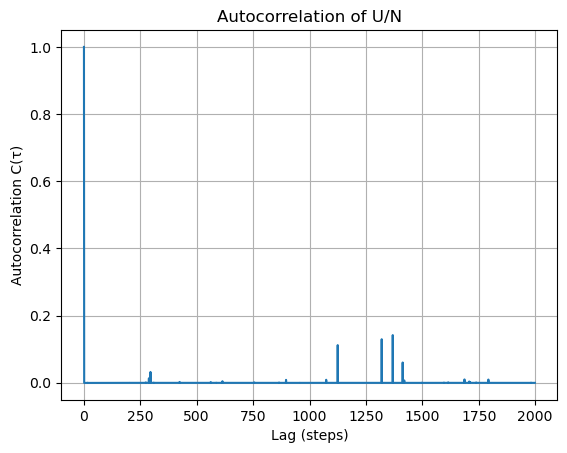

Tempo di autocorrelazione integrato: 0.50 steps

Informazioni aggiuntive:
Lunghezza serie temporale: 5000 steps
Numero di campioni indipendenti approssimativo: 10000
Errore statistico ridotto di un fattore: 0.71


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Carica il file
data = np.loadtxt("./potential_energy_md.dat", usecols=1)  # ACTUAL_PE
U = data - np.mean(data)   # centro sui valori

M = len(U)
C = np.correlate(U, U, mode='full')
C = C[M-1:] / C[M-1]  # normalizzazione

# Plot dell'autocorrelazione
plt.plot(C[:2000])  # prime 2000 lag
plt.xlabel("Lag (steps)")
plt.ylabel("Autocorrelation C(τ)")
plt.title("Autocorrelation of U/N")
plt.grid(True)
plt.show()

# Metodo robusto: tempo di autocorrelazione integrato con finestra automatica
def integrated_autocorrelation_time(C):
    """
    Calcola il tempo di autocorrelazione integrato con finestra automatica
    basata sul criterio di Sokal (finestra = 6 * tau_int)
    """
    # Stima iniziale con finestra fissa ragionevole
    window = min(1000, len(C)//4)
    tau_prev = 0.5
    for i in range(1, window):
        tau_prev += C[i]
        if C[i] < 0:
            break
    
    # Iterazione per convergenza (massimo 10 iterazioni)
    for iteration in range(10):
        window = min(6 * int(tau_prev) + 1, len(C)//2)
        tau_int = 0.5
        for i in range(1, window):
            tau_int += C[i]
            if C[i] < 0:
                break
        
        # Controlla convergenza
        if abs(tau_int - tau_prev) < 0.1:
            break
        tau_prev = tau_int
    
    return tau_int

tau_int = integrated_autocorrelation_time(C)
print(f"Tempo di autocorrelazione integrato: {tau_int:.2f} steps")

# Stampa informazioni utili
print(f"\nInformazioni aggiuntive:")
print(f"Lunghezza serie temporale: {M} steps")
print(f"Numero di campioni indipendenti approssimativo: {M/tau_int:.0f}")
print(f"Errore statistico ridotto di un fattore: {np.sqrt(tau_int):.2f}")

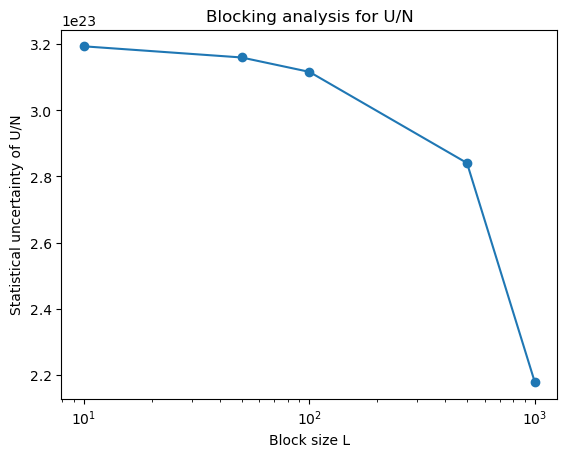

In [23]:
def block_average(data, L):
    M = len(data)
    N_blocks = M // L
    block_means = np.array([np.mean(data[i*L:(i+1)*L]) for i in range(N_blocks)])
    mean = np.mean(block_means)
    var = np.var(block_means, ddof=1)
    error = np.sqrt(var / N_blocks)
    return mean, error

L_values = [10, 50, 100, 500, 1000, 5000]
errors = []

for L in L_values:
    mean, err = block_average(data, L)
    errors.append(err)

plt.errorbar(L_values, errors, fmt='o-')
plt.xscale("log")
plt.xlabel("Block size L")
plt.ylabel("Statistical uncertainty of U/N")
plt.title("Blocking analysis for U/N")
plt.show()
